# EMG.

Физическая активность.

Набор данных относится к классификации 6 состояний физической активности: спокойные: хлопки(1), ходьба(2), бег(3), агрессивные: толкание(4), фронтальный удар(5), удар ногой(6). 

Данные:
   - сигнал электрода, прикрепленного к мышце (С1-С8): 
        - R-Bic: right bicep (C1)
	    - R-Tri: right tricep (C2)
	    - L-Bic: left bicep (C3)
	    - L-Tri: left tricep (C4)
	    - R-Thi: right thigh (C5)
	    - R-Ham: right hamstring (C6)
	    - L-Thi: left thigh (C7)
	    - L-Ham: left hamstring (C8)
   - активность (Action): Clapping(1), Walking(2), Running(3), Elbowing(4), Frontkicking(5), Hamering(6).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Читаем данные из файлов и именуем столбцы.

In [2]:
data1 = pd.read_csv('1.txt', sep = '\t', engine = 'python')
data1.columns = ["С1", "С2", "С3","С4", "С5", "С6","С7", "С8"]
data1['Action']=1
data2 = pd.read_csv('2.txt', sep = '\t', engine = 'python')
data2.columns = ["С1", "С2", "С3","С4", "С5", "С6","С7", "С8"]
data2['Action']=2
data3 = pd.read_csv('3.txt', sep = '\t', engine = 'python')
data3.columns = ["С1", "С2", "С3","С4", "С5", "С6","С7", "С8"]
data3['Action']=3
data4 = pd.read_csv('4.txt', sep = '\t', engine = 'python')
data4.columns = ["С1", "С2", "С3","С4", "С5", "С6","С7", "С8"]
data4['Action']=4
data5 = pd.read_csv('5.txt', sep = '\t', engine = 'python')
data5.columns = ["С1", "С2", "С3","С4", "С5", "С6","С7", "С8"]
data5['Action']=5
data6 = pd.read_csv('6.txt', sep = '\t', engine = 'python')
data6.columns = ["С1", "С2", "С3","С4", "С5", "С6","С7", "С8"]
data6['Action']=6

Объединим данные.

In [3]:
data = pd.merge(data1, data2, how='outer')
data = pd.merge(data, data3, how='outer')
data = pd.merge(data, data4, how='outer')
data = pd.merge(data, data5, how='outer')
data = pd.merge(data, data6, how='outer')
data

,С1,С2,С3,С4,С5,С6,С7,С8,Action
0,-149,-137,-140,-106,-134,-148,-156,-144,1
1,-121,-178,-152,-82,-117,-173,-196,-139,1
2,-58,-188,-138,-51,-153,-161,-182,-141,1
3,-18,-148,-114,-41,-126,-183,-188,-109,1
4,-51,-162,-78,-44,-99,-147,-177,-98,1
5,-12,-158,-33,-118,-83,-122,-154,-109,1
6,54,-154,71,-191,-47,-134,-123,-94,1
7,35,-151,107,-198,-44,-97,-113,-80,1
8,-13,-171,88,-198,-1,-81,-97,-73,1
9,-8,-160,56,-163,-20,-78,-80,-54,1


# Основные характеристики.

In [4]:
data.describe()

,С1,С2,С3,С4,С5,С6,С7,С8,Action
count,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000
mean,-44.349239,7.505911,-28.541274,9.047957,44.801136,51.069680,50.656423,29.786843,3.473980
std,1342.118474,625.744788,1146.681762,784.739179,1394.708976,1461.563205,1971.066079,1646.442417,1.708616
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,1.000000
25%,-272.000000,-69.000000,-229.000000,-78.000000,-252.000000,-341.000000,-527.000000,-500.000000,2.000000
50%,-18.000000,6.000000,-11.000000,-13.000000,28.000000,29.000000,26.000000,16.000000,3.000000
75%,139.000000,81.000000,142.000000,53.000000,379.000000,495.000000,645.000000,583.000000,5.000000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,6.000000


Построим матрицу ковариаций оспользуя библиотеку pandas.

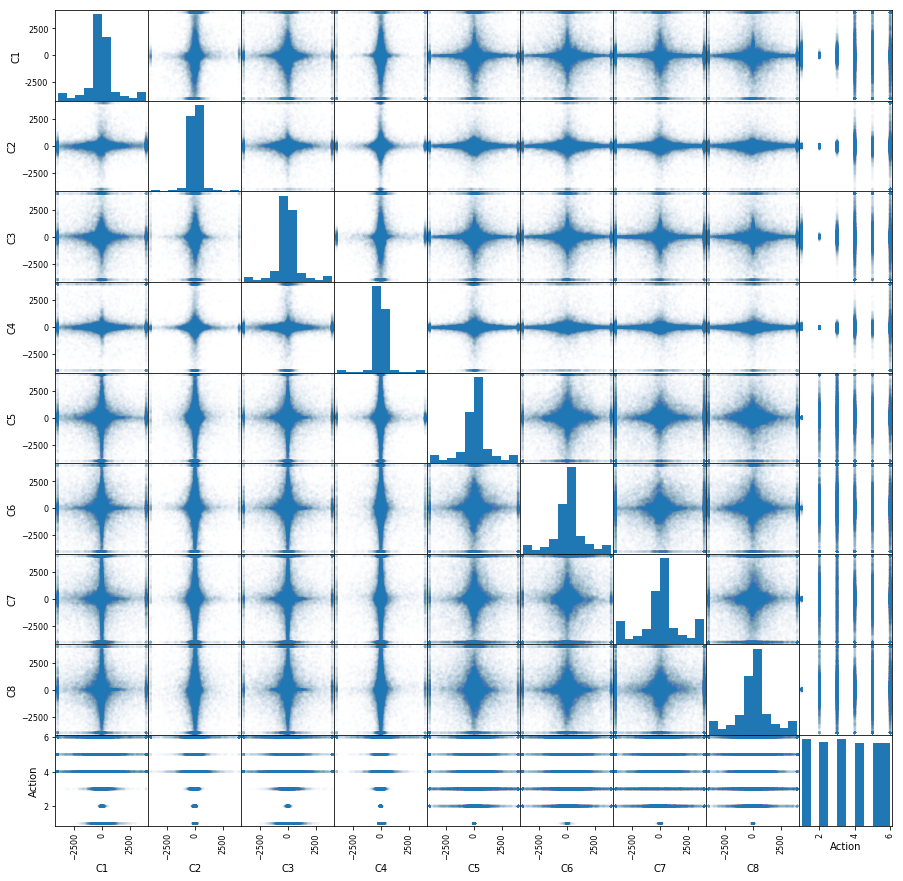

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

Определим корреляцию параметров.

In [6]:
data.corr()

,С1,С2,С3,С4,С5,С6,С7,С8,Action
С1,1.000000,0.086191,-0.004817,0.000892,0.003328,-0.000520,0.004298,0.000155,-0.025307
С2,0.086191,1.000000,-0.016184,0.009425,0.004526,0.009278,0.011685,0.014118,0.009650
С3,-0.004817,-0.016184,1.000000,0.032008,0.002260,-0.006317,0.015911,0.007438,-0.020735
С4,0.000892,0.009425,0.032008,1.000000,0.002502,0.004321,0.005032,0.003589,0.041365
С5,0.003328,0.004526,0.002260,0.002502,1.000000,0.007172,0.037220,-0.037839,0.004645
С6,-0.000520,0.009278,-0.006317,0.004321,0.007172,1.000000,0.038041,-0.041278,-0.004121
С7,0.004298,0.011685,0.015911,0.005032,0.037220,0.038041,1.000000,0.033087,0.001215
С8,0.000155,0.014118,0.007438,0.003589,-0.037839,-0.041278,0.033087,1.000000,0.005679
Action,-0.025307,0.009650,-0.020735,0.041365,0.004645,-0.004121,0.001215,0.005679,1.000000


Поскольку значения для С1 и С2 электрода лучше всех коррелируют, построим для них графики.

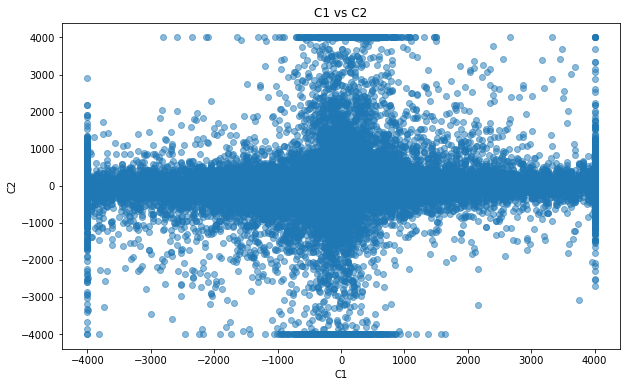

In [7]:
plt.figure(figsize = (10, 6))
plt.plot(data['С1'], data['С2'], 'o', alpha = 0.5)
plt.xlabel('С1')
plt.ylabel('С2')
plt.title('С1 vs С2')
pass

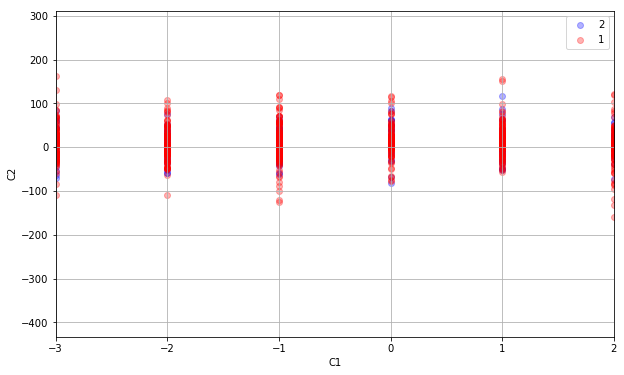

In [9]:
plt.figure(figsize = (10, 6))
plt.scatter(data[data['Action'] == 1]['С1'],
            data[data['Action'] == 1]['С2'],
            alpha = 0.3,
            label = '2',
            color = 'b')

plt.scatter(data[data['Action'] == 2]['С1'],
            data[data['Action'] == 2]['С2'],
            alpha = 0.3,
            label = '1',
            color = 'r')

plt.xlabel('С1')
plt.xlim(-3, 2)
plt.ylabel('С2')
plt.legend()
plt.grid()

Выведем параметры всех столбцов.

In [11]:
data.describe(include = 'all')

,С1,С2,С3,С4,С5,С6,С7,С8,Action
count,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000
mean,-44.349239,7.505911,-28.541274,9.047957,44.801136,51.069680,50.656423,29.786843,3.473980
std,1342.118474,625.744788,1146.681762,784.739179,1394.708976,1461.563205,1971.066079,1646.442417,1.708616
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,1.000000
25%,-272.000000,-69.000000,-229.000000,-78.000000,-252.000000,-341.000000,-527.000000,-500.000000,2.000000
50%,-18.000000,6.000000,-11.000000,-13.000000,28.000000,29.000000,26.000000,16.000000,3.000000
75%,139.000000,81.000000,142.000000,53.000000,379.000000,495.000000,645.000000,583.000000,5.000000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,6.000000


Определяем уникальные значения в столбце "Action".

In [12]:
data['Action'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Решаем поставленную задачу классификации.
Подготавливаем данные.

Определим тип Action.

In [13]:
data['Action'].dtype.name

'int64'

Разделим столбцы на numerical_columns и categorical_columns.

In [14]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['С1', 'С2', 'С3', 'С4', 'С5', 'С6', 'С7', 'С8', 'Action']


Посмотрим есть ли пропущенные значения.
Если они будут, заполним их медианными значениями.

In [15]:
data.median(axis = 0)

С1       -18.0
С2         6.0
С3       -11.0
С4       -13.0
С5        28.0
С6        29.0
С7        26.0
С8        16.0
Action     3.0
dtype: float64

In [16]:
data = data.fillna(data.median(axis = 0), axis = 0)

# Векторизация данных.

In [17]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,С1,С2,С3,С4,С5,С6,С7,С8,Action
count,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000
mean,-44.349239,7.505911,-28.541274,9.047957,44.801136,51.069680,50.656423,29.786843,3.473980
std,1342.118474,625.744788,1146.681762,784.739179,1394.708976,1461.563205,1971.066079,1646.442417,1.708616
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,1.000000
25%,-272.000000,-69.000000,-229.000000,-78.000000,-252.000000,-341.000000,-527.000000,-500.000000,2.000000
50%,-18.000000,6.000000,-11.000000,-13.000000,28.000000,29.000000,26.000000,16.000000,3.000000
75%,139.000000,81.000000,142.000000,53.000000,379.000000,495.000000,645.000000,583.000000,5.000000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,6.000000


In [18]:
data_core = data['Action'];
data_numerical = data_numerical.drop(('Action'), axis = 1)
data_numerical.describe()

,С1,С2,С3,С4,С5,С6,С7,С8
count,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000,58281.000000
mean,-44.349239,7.505911,-28.541274,9.047957,44.801136,51.069680,50.656423,29.786843
std,1342.118474,625.744788,1146.681762,784.739179,1394.708976,1461.563205,1971.066079,1646.442417
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000
25%,-272.000000,-69.000000,-229.000000,-78.000000,-252.000000,-341.000000,-527.000000,-500.000000
50%,-18.000000,6.000000,-11.000000,-13.000000,28.000000,29.000000,26.000000,16.000000
75%,139.000000,81.000000,142.000000,53.000000,379.000000,495.000000,645.000000,583.000000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000


# Нормализация данных.

In [19]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,С1,С2,С3,С4,С5,С6,С7,С8
count,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04
mean,-7.688372e-17,-1.666508e-17,-2.681405e-17,7.453682e-16,-2.564094e-16,3.774274e-17,3.248749e-16,4.572334e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.947319e+00,-6.404378e+00,-3.463436e+00,-5.108765e+00,-2.900104e+00,-2.771738e+00,-2.055059e+00,-2.447572e+00
25%,-1.696205e-01,-1.222638e-01,-1.748164e-01,-1.109260e-01,-2.128051e-01,-2.682537e-01,-2.930680e-01,-3.217767e-01
50%,1.963257e-02,-2.406590e-03,1.529742e-02,-2.809590e-02,-1.204634e-02,-1.510005e-02,-1.250918e-02,-8.373717e-03
75%,1.366118e-01,1.174506e-01,1.487259e-01,5.600847e-02,2.396191e-01,3.037367e-01,3.015341e-01,3.360052e-01
max,3.013407e+00,6.380387e+00,3.513216e+00,5.085705e+00,2.835860e+00,2.701854e+00,2.003659e+00,2.411389e+00


Объединим данные в одной таблице.

In [20]:
data = pd.concat((data_numerical, data_core), axis = 1)
data.describe()

,С1,С2,С3,С4,С5,С6,С7,С8,Action
count,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,5.828100e+04,58281.000000
mean,-7.688372e-17,-1.666508e-17,-2.681405e-17,7.453682e-16,-2.564094e-16,3.774274e-17,3.248749e-16,4.572334e-16,3.473980
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.708616
min,-2.947319e+00,-6.404378e+00,-3.463436e+00,-5.108765e+00,-2.900104e+00,-2.771738e+00,-2.055059e+00,-2.447572e+00,1.000000
25%,-1.696205e-01,-1.222638e-01,-1.748164e-01,-1.109260e-01,-2.128051e-01,-2.682537e-01,-2.930680e-01,-3.217767e-01,2.000000
50%,1.963257e-02,-2.406590e-03,1.529742e-02,-2.809590e-02,-1.204634e-02,-1.510005e-02,-1.250918e-02,-8.373717e-03,3.000000
75%,1.366118e-01,1.174506e-01,1.487259e-01,5.600847e-02,2.396191e-01,3.037367e-01,3.015341e-01,3.360052e-01,5.000000
max,3.013407e+00,6.380387e+00,3.513216e+00,5.085705e+00,2.835860e+00,2.701854e+00,2.003659e+00,2.411389e+00,6.000000


# Зададим X и y.

In [21]:
X = data.drop(('Action'), axis = 1)
y = data['Action']
feature_names = X.columns

In [22]:
type(feature_names)

pandas.core.indexes.base.Index

In [23]:
feature_names

Index(['С1', 'С2', 'С3', 'С4', 'С5', 'С6', 'С7', 'С8'], dtype='object')

In [24]:
print(X.shape)
print(y.shape)
N, d = X.shape

(58281, 8)
(58281,)


In [25]:
type(X)

pandas.core.frame.DataFrame

In [26]:
type(y)

pandas.core.series.Series

Получим обучающие и тестовые выборки.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

40796 17485


# kNN

Объявляем классификатор с параметром k = 15. Обучаем модели на обучающей выборке X_train, y_train

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [29]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Считаем среднюю ошибку.

In [30]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.244337680165 0.276008006863


In [31]:
err_test = 1 - knn.score(X_test, y_test)

In [32]:
err_test

0.2760080068630254

С помощью метода confusion matrix вычисляем точность работы классификатора. Элемент матрицы (i, j) будет равен числу объектов из группы i, а предсказанных в группу j

In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[3057    9    0    3    1    0]
 [  23 2631  185    0    8    0]
 [   3  530 2237   19  129    4]
 [ 145  238  195 1637  452  263]
 [  90  489  306  399 1344  154]
 [  22   53  154  593  359 1753]]


Осуществляем подбор параметров

In [34]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.206981076576 1


Проведем классификацию и посчитаем ошибки при данном параметре k.

In [35]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.198398627395


# SVC

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.287307579174 0.299342293394


# Random Forest

In [39]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.153503002574


Значимость признаков

In [40]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [41]:
np.sum(rf.feature_importances_)

1.0000000000000004

In [42]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature '   С7' (0.145648)
 2. feature '   С4' (0.132250)
 3. feature '   С3' (0.126199)
 4. feature '   С1' (0.125638)
 5. feature '   С5' (0.124529)
 6. feature '   С8' (0.121702)
 7. feature '   С2' (0.115487)
 8. feature '   С6' (0.108546)


In [43]:
feature_names[[1,0,1]]

Index(['С2', 'С1', 'С2'], dtype='object')

(-1, 8)

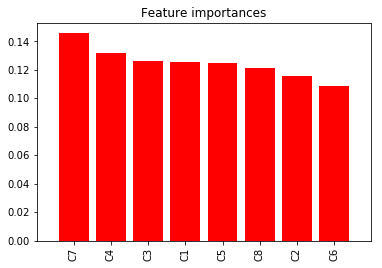

In [45]:
d_first = 8
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [46]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.15916499857


# AdaBoost

In [47]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.578880282381 0.57157563626


# GBT

In [48]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0978037062457 0.200057191879
